# Introduction

**cancer Detection**: the goal of the challenge is predicting  if the cancer diognaases malignant or benign depend on several observation (features)

**import libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**we load our data and start  preparing it**

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

**Convert dataset to Dataframe using Panda**

In [ ]:
data_set= pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
data_set['target']=cancer['target']


In [ ]:
# preview of data (5 first result)
data_set.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Data Cleaning

**we wil start to do some check on our data**
- **check Categorical Variables**
- **nan Variables**
- **null Variables**

In [ ]:
cat=data_set.dtypes=='object'
cat_list=list(cat[cat].index)
print("Categorical variables:")
cat_list

Categorical variables:


[]

In [ ]:
data_set.isna().any().sum()

0

In [ ]:
data_set.isnull().any().sum()

0

**Visualization the Data**

shows the relation between the input data and the target

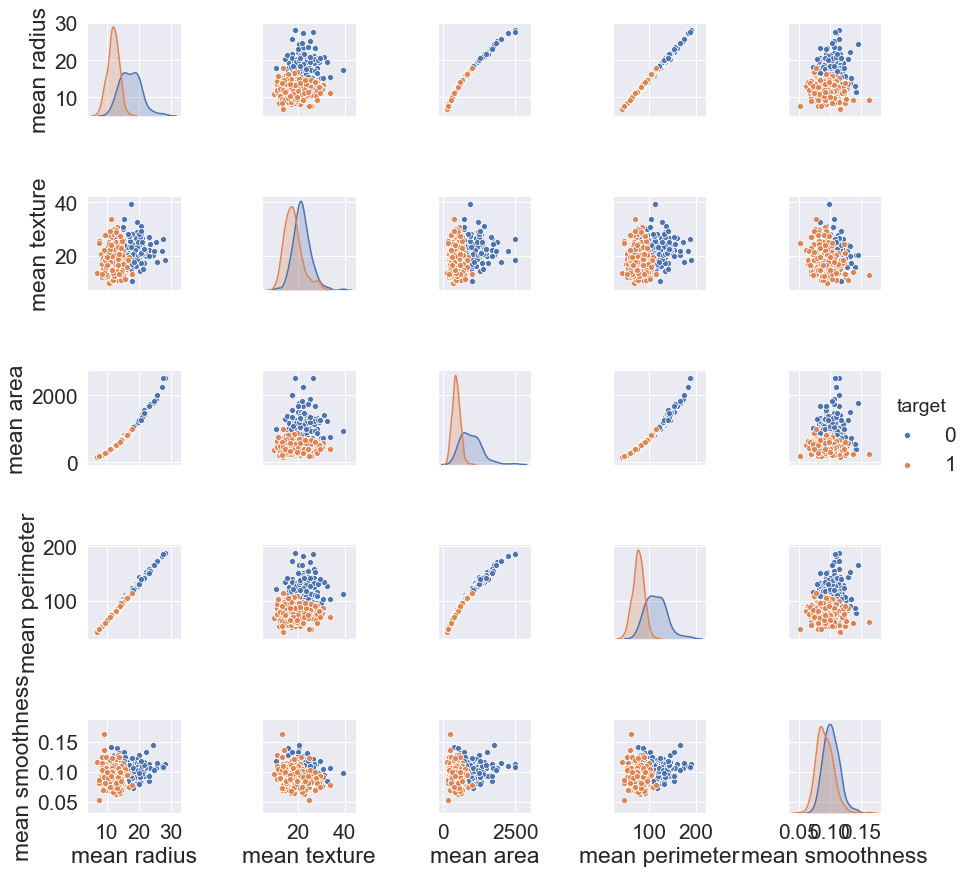

In [ ]:
sns.pairplot(data_set, hue = 'target', vars = ['mean radius','mean texture', 'mean area', 'mean perimeter', 'mean smoothness'])

**show  the correlation of the features**

## Preparing Data

**drop the target column from the dataset to create the input of the model**

In [ ]:
X=data_set.drop('target',axis=1)

In [ ]:
# create the expected output
Y=data_set['target']

### Split  Data into Train Data and Test Data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.22,random_state=44,shuffle=True)

### Normalize Data

In [ ]:
# frist we will normalize the data set 
from sklearn.preprocessing import MinMaxScaler
scal=MinMaxScaler(copy=True,feature_range=(0,1))
x_train=scal.fit_transform(x_train)
x_test=scal.fit_transform(x_test)
x_train=pd.DataFrame(x_train,columns=cancer['feature_names'])
x_test=pd.DataFrame(x_test,columns=cancer['feature_names'])
x_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.661921,0.612107,0.633149,0.498621,0.433515,0.301418,0.364447,0.435964,0.195960,0.125527,...,0.588403,0.675906,0.559241,0.414569,0.337648,0.241397,0.331150,0.537113,0.171727,0.184319
1,0.191741,0.109909,0.173992,0.094719,0.250584,0.060955,0.007247,0.034438,0.192929,0.157329,...,0.157595,0.164712,0.137756,0.069996,0.303308,0.053992,0.014808,0.135842,0.231073,0.142097
2,0.085767,0.241123,0.080218,0.038515,0.570491,0.188001,0.000000,0.000000,0.467172,0.442713,...,0.079687,0.287313,0.067732,0.032393,0.494156,0.100620,0.000000,0.000000,0.173304,0.219581
3,0.681981,0.520122,0.693243,0.510498,0.637254,0.699336,0.744371,0.770518,0.550000,0.396588,...,0.581999,0.463486,0.640918,0.401543,0.459156,0.379651,0.527077,0.873540,0.268730,0.285771
4,0.155536,0.334122,0.146321,0.071347,0.530433,0.190603,0.011785,0.058338,0.369192,0.281171,...,0.096763,0.289446,0.087006,0.039840,0.365383,0.089948,0.008027,0.076701,0.137224,0.080176


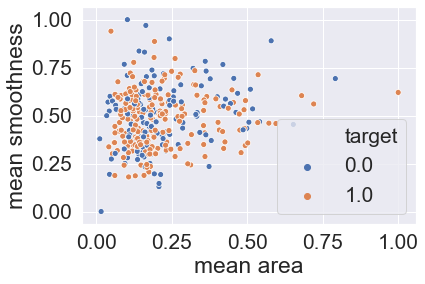

In [ ]:
# Figure 2: Train data scaled
sns.scatterplot(x = x_train['mean area'], y =x_train ['mean smoothness'], hue = y_train)

##  Train The Model 
here in our model we want to classify the output to 1 (malignant) or 0 (benign) depended on the data set we will  use support vector machine model to classify our data

In [ ]:
from sklearn.svm import SVC
svc=SVC()

In [ ]:
svc.fit(x_train,y_train)

## Evalute the Model 
**predict the output of our model according using the validation dataset**

In [ ]:
y_predict=svc.predict(x_test)

In [ ]:
# calculate the confusion matrix in order to evaluate the results
from sklearn.metrics import confusion_matrix,accuracy_score
cn_mat=confusion_matrix(y_test,y_predict)
cn_mat

array([[41,  4],
       [ 0, 81]], dtype=int64)

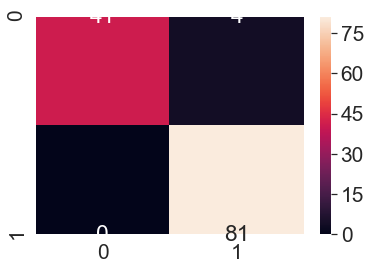

In [ ]:
#show comparizon using Heat Map

sns.heatmap(cn_mat,annot=True)

  **measure the accurcy of the model we find it so bad so we need to improve or model**

## optimize the model


**C parameter**:  C is a regularization parameter that controls the trade off between the achieving a low training error and a low testing error that is the ability to generalize your classifier to unseen data
- **large C**:the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly
- **small C**: C is too small then you give your objective function a certain freedom to increase |w| a lot, which will lead to large training error



**Gamma**:controls how far the influence of a single set reaches
- **large gamma:** leads to high bias and low variance
- **small gamma:**leads to low bias and high variance

## Grid Sreach

we wil use grid search to fit the best paramters

In [ ]:
param={'C':[.1,1,10,100],'gamma':[1,.1,.01,.001],'kernel':['rbf']}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:

grid=GridSearchCV(SVC(),param,refit=True,verbose=4)

In [ ]:
grid.fit(x_train,y_train)

In [ ]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [ ]:
predict=grid.predict(x_test)

In [ ]:
cn_mat=confusion_matrix(y_test,predict)
cn_mat

array([[44,  1],
       [ 1, 80]], dtype=int64)

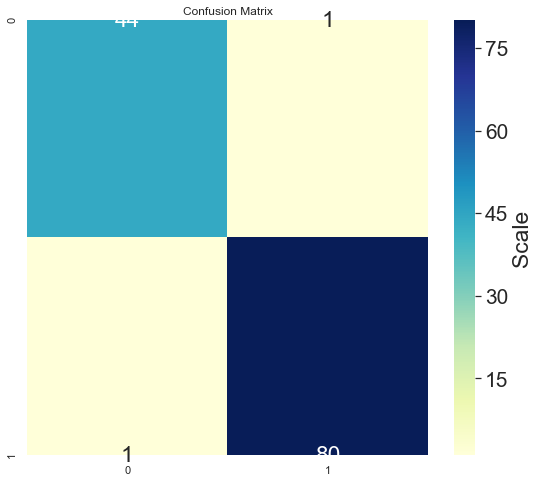

In [ ]:
sns.set(color_codes=True)
plt.figure(1, figsize=(9, 8))
 
plt.title("Confusion Matrix")
 
sns.set(font_scale=1.9)
sns.heatmap(cn_mat,annot=True,cmap="YlGnBu",cbar_kws={'label': 'Scale'})

In [ ]:
accuracy_score(y_test,predict)

0.9841269841269841